In [108]:
''' required import '''

from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2
import pytesseract

In [109]:
''' noise reducer '''

def noiseReducer(img):
    img = np.array(img)
    img = cv2.GaussianBlur(img, (7, 7), 0)
    img = Image.fromarray(img, 'RGB')
    return img

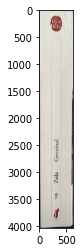

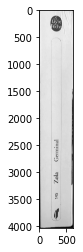

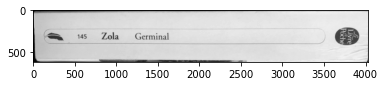

   
     
 

Ss 145 Zola Germinal

 

 



In [110]:
''' book spine processing '''

# constraint : 
# the book must be oriented at 90°

# image load
img = Image.open('../image/bookSpine/3.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)


"""
img : image of a book spine
return : book's information
"""
def bookSpineProcessing(img):
    
    width, height = img.size
    
    # gray converter
    img = np.array(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # binarisation
    # binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    
    # noise reducer
    img = cv2.GaussianBlur(gray, (7, 7), 0)
    img = Image.fromarray(img)
    
    # rotation
    rotate = img.rotate(-90, expand = 1)
    plt.imshow(rotate, cmap='gray')
    plt.show()
    
    # OCR
    text = pytesseract.image_to_string(rotate)
    print(text)
    
    return None

# show result
bookSpineProcessing(img)

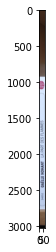

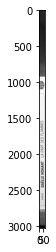

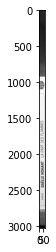

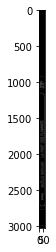

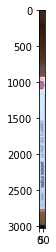

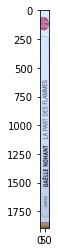

In [111]:
''' book spine extraction '''

# constraint :
# nothing for now

# image load
img = Image.open('../image/noisyBookSpine/3')
plt.imshow(img)
plt.show()


"""
img : image of a noisy book spine
return : list of book spine
"""
def bookSpineExtraction(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    #gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 10, 100)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    threshold = width//2
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    coordinate.append((0,0))
    for line in lines:
        for rho,theta in line:
            if np.pi/2-1<theta and theta<np.pi/2+1:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + width*(-b))
                y1 = int(y0 + height*(a))
                x2 = int(x0 - width*(-b))
                y2 = int(y0 - height*(a))
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((y1,y2))
    coordinate.append((height,height))
    plt.imshow(houghTransform)
    plt.show()
    
    # segmentation
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = height//10
    for y1,y2 in coordinate:
        if (last != None and last<min(y1,y2)-threshold):
            # crop
            im = img.crop((0, last, width, max(y1,y2)))
            w,h = im.size
            # add it
            croppedImg.append((h,im))
        last = min(y1,y2)
    croppedImg.sort(reverse=True)
    i, img = croppedImg[0]
    return img

img = bookSpineExtraction(img)
plt.imshow(img)
plt.show()

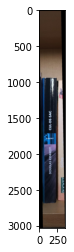

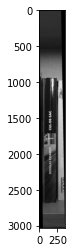

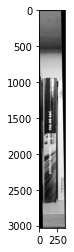

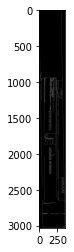

ValueError: operands could not be broadcast together with shapes (0,) (7,1,2) 

In [123]:
''' row segmentation lvl2 '''

# constraint :
# nothing for now

# image load
img = Image.open('../image/noisyBookSpine/9')
plt.imshow(img)
plt.show()


"""
img : image of a noisy book spine
return : list of book spine
"""
def rowSegmentation2(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    threshold = 300
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    coordinate.append((0,0))
    if len(lines)>0:# don't work !!!!!!!!!!!!
        for line in lines:
            for rho,theta in line:
                if theta<np.pi/2-0.3 or np.pi/2+0.3<theta:
                    a = np.cos(theta)
                    b = np.sin(theta)
                    x0 = a*rho
                    y0 = b*rho
                    x1 = int(x0 + width*(-b))
                    y1 = int(y0 + height*(a))
                    x2 = int(x0 - width*(-b))
                    y2 = int(y0 - height*(a))
                    houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                    coordinate.append((x1,x2))
    coordinate.append((width,width))
    plt.imshow(houghTransform)
    plt.show()
    
    # segmentation
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = width//5
    for x1,x2 in coordinate:
        if (last != None and last<min(x1,x2)-threshold):
            # crop
            im = img.crop((last, 0, max(x1,x2), height))
            # add it
            croppedImg.append(im)
        last = min(x1,x2)
        
    return croppedImg

images = rowSegmentation2(img)
for im in images:
    plt.imshow(im)
    plt.show()

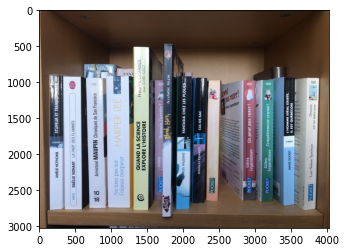

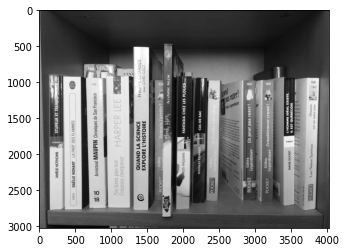

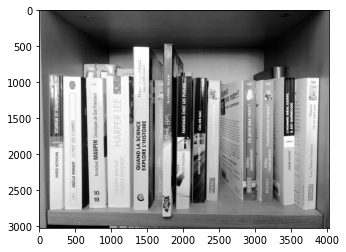

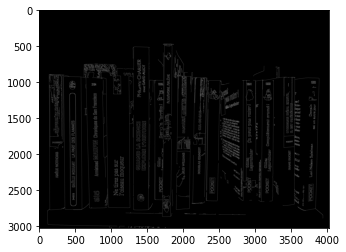

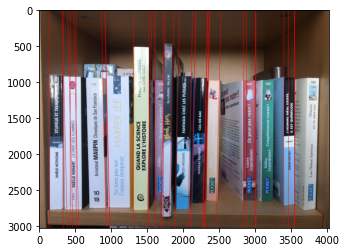

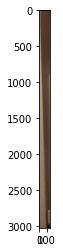

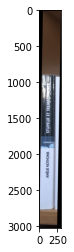

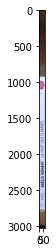

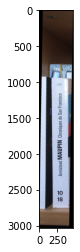

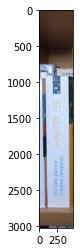

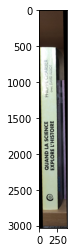

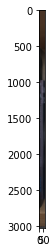

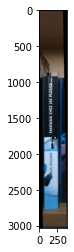

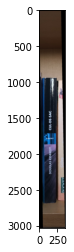

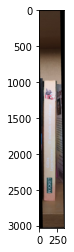

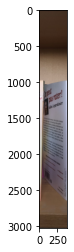

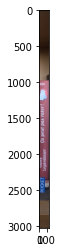

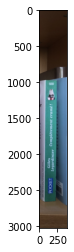

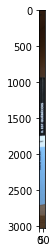

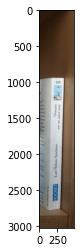

In [113]:
''' row segmentation lvl1 '''

# constraint : 
# doesn't work with thin book spines 
# it's much better with vertical books

# image load
img = Image.open('../image/bookRow/5.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)

"""
img : image of a book row
return : list of noisy book spines
"""
def rowSegmentation1(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    threshold = 300
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    coordinate.append((0,0,0))
    for line in lines:
        for rho,theta in line:
            if theta<np.pi/2-0.3 or np.pi/2+0.3<theta:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + width*(-b))
                y1 = int(y0 + height*(a))
                x2 = int(x0 - width*(-b))
                y2 = int(y0 - height*(a))
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((x1,x2,theta))
    coordinate.append((width,width,0))
    plt.imshow(houghTransform)
    plt.show()
    
    # segmentation
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = width/50
    for x1,x2,theta in coordinate:
        if (last != None and last<min(x1,x2)-threshold):
            # crop
            im = img.crop((last, 0, max(x1,x2), height))
            # rotate
            theta = math.degrees(theta)
            if theta>90:
                theta = theta-180
            else:
                theta = theta
            im = im.rotate(theta, expand = 1)
            # add it
            croppedImg.append(im)
        last = min(x1,x2)
    
    return croppedImg

# show result
images = rowSegmentation1(img)
for im in images:
    plt.imshow(im)
    plt.show()

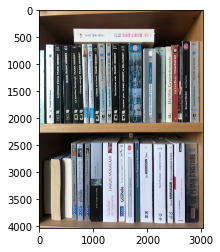

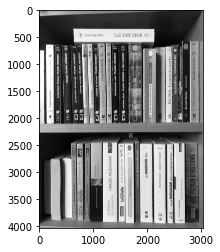

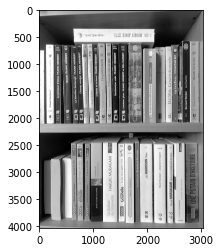

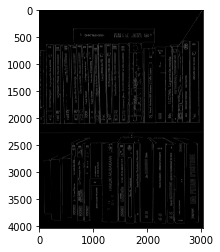

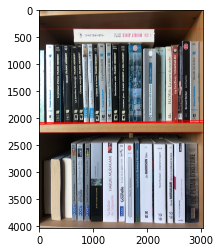

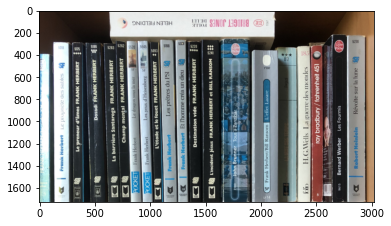

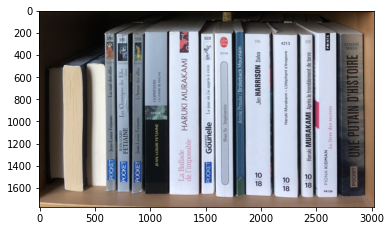

In [114]:
''' bookshelf segmentation '''

# constraint : 
# doesn't work with thin book spines 
# doesn't work with low definition image

# image load
img = Image.open('../image//bookshelf/3.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)


"""
img : image of a vertical bookshelf
return : list of book rows
"""
def bookshelfSegmentation(img):
    
    width, height = img.size
    img = np.array(img)
    
    # gray converter
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    
    # histogram equalizer
    gray = cv2.equalizeHist(gray)
    plt.imshow(gray, cmap='gray')
    plt.show()

    # canny filter
    edges = cv2.Canny(gray, 50, 200)
    plt.imshow(edges, cmap='gray')
    plt.show()

    # hough transform
    threshold = 300
    coordinate = []
    houghTransform = img.copy()
    lines = cv2.HoughLines(edges, 1, np.pi/180, threshold)
    coordinate.append(0)
    for line in lines:
        for rho,theta in line:
            if np.pi/2-0.1<theta and theta<np.pi/2+0.1:
                a = np.cos(theta)
                b = np.sin(theta)
                x0 = a*rho
                y0 = b*rho
                x1 = int(x0 + width*(-b))
                y1 = int(y0 + height*(a))
                x2 = int(x0 - width*(-b))
                y2 = int(y0 - height*(a))
                houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
                coordinate.append((y1+y2)//2)
    coordinate.append(height)
    plt.imshow(houghTransform)
    plt.show()

    # crop image
    croppedImg = []
    coordinate.sort()
    img = Image.fromarray(img, 'RGB')
    last = None
    threshold = height/10
    for y in coordinate:
        if (last != None and last<y-threshold):
            croppedImg.append(img.crop((0, last, width, y)))
        last = y
    
    return croppedImg

# show result
images = bookshelfSegmentation(img)
for im in images:
    plt.imshow(im)
    plt.show()

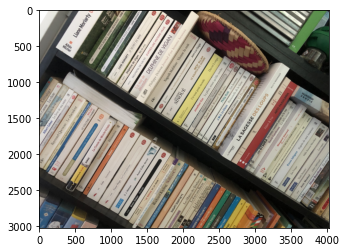

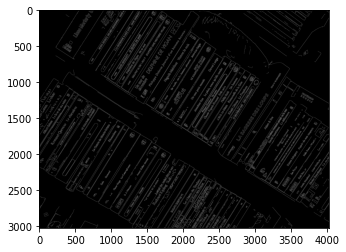

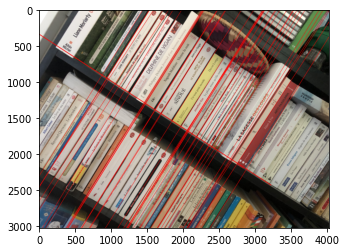

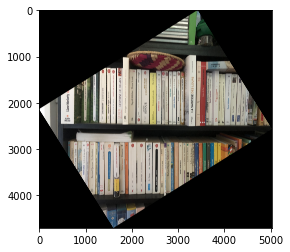

In [115]:
''' bookshelf orientation '''

# constraint : 
# the majority of the books must be well oriented
# the image should not be too askew

# image load
img = Image.open('../image/askewBookshelf/1.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)

"""
img : askew image of bookshelf
return : reoriented image
"""
def bookshelfOrientation(img):
    
    width, height = img.size
    img = np.array(img)
    
    # canny filter
    edges = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(edges, 50, 150)
    plt.imshow(edges, cmap='gray')
    plt.show()  

    # hough transform
    treshold = 500
    lines = cv2.HoughLines(edges, 1, np.pi/180, treshold)
    length = max(width, height)
    angles = []
    houghTransform = img.copy()
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + length*(-b))
            y1 = int(y0 + length*(a))
            x2 = int(x0 - length*(-b))
            y2 = int(y0 - length*(a))
        
            houghTransform = cv2.line(houghTransform, (x1,y1), (x2,y2), (255,0,0), 3)
            angles.append(theta)

    plt.imshow(houghTransform)
    plt.show()
    
    # orientation
    angles.sort()
    theta = angles[len(angles)//2]
    theta = math.degrees(theta)
    if theta>90:
        theta = theta - 180
    img = Image.fromarray(img, 'RGB')
    img = img.rotate(theta, expand = 1)
    
    return img

# show result
img = bookshelfOrientation(img)
plt.imshow(img)
plt.show()

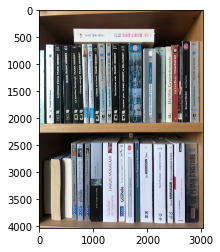

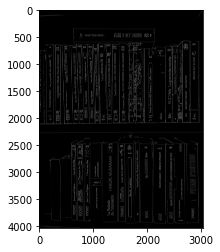

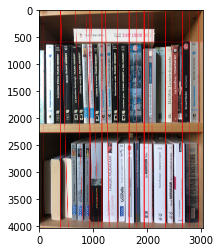

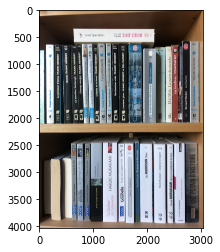

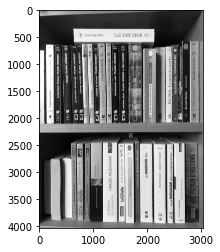

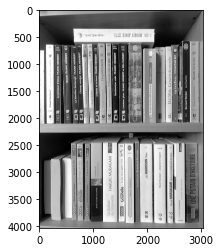

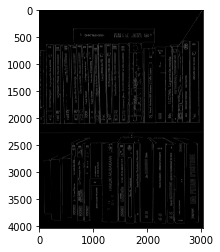

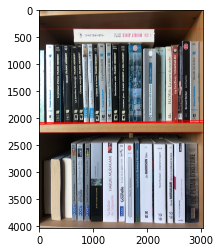

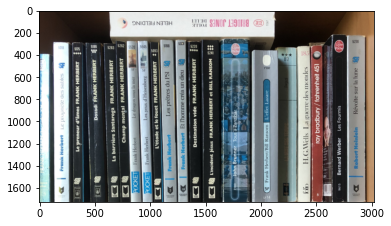

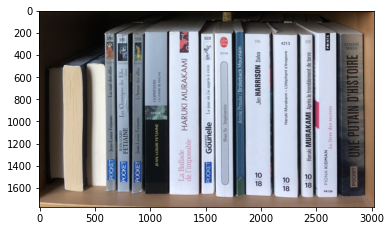

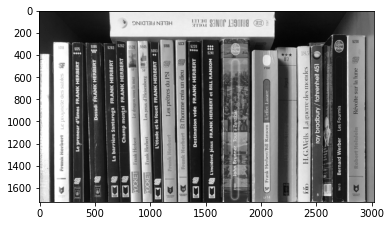

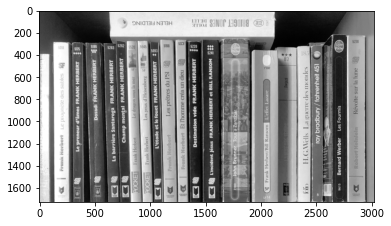

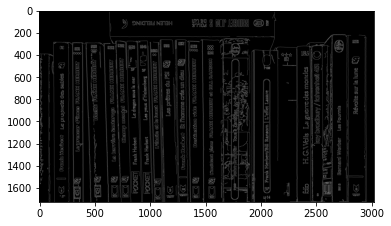

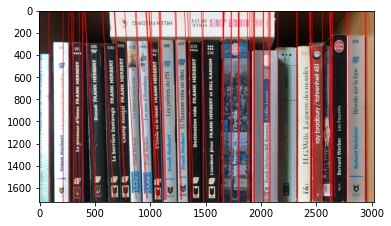

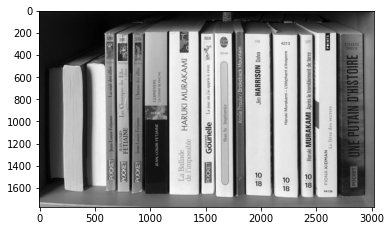

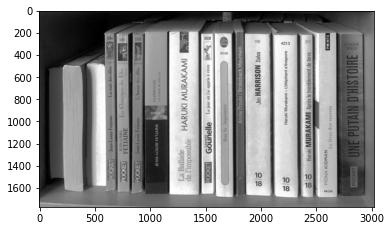

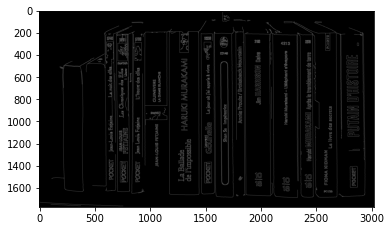

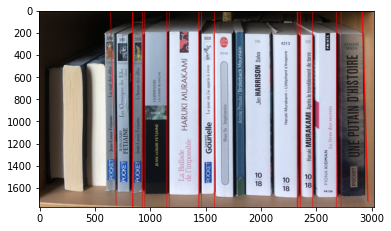

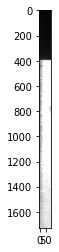

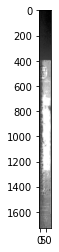

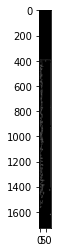

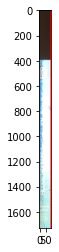

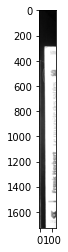

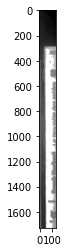

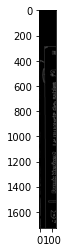

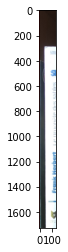

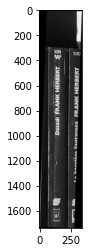

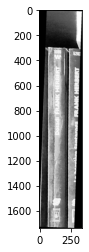

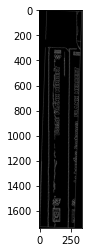

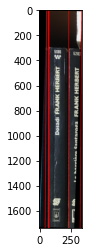

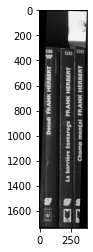

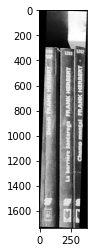

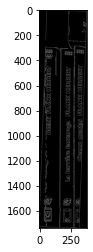

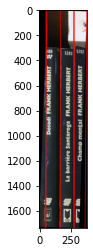

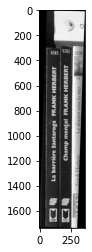

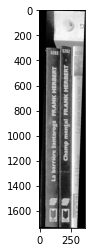

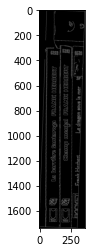

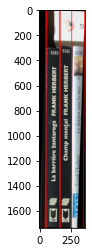

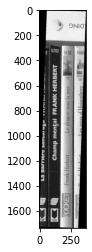

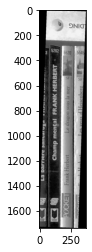

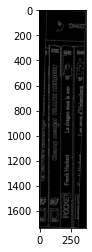

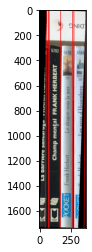

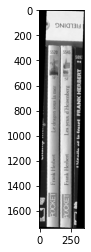

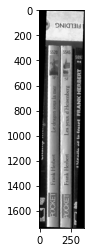

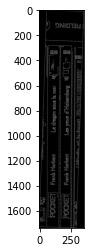

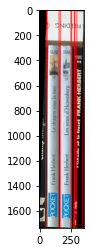

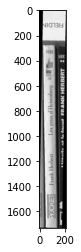

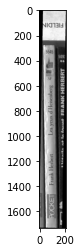

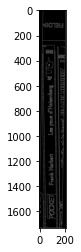

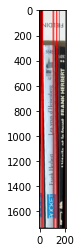

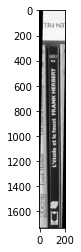

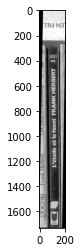

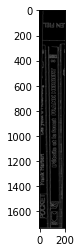

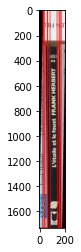

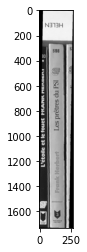

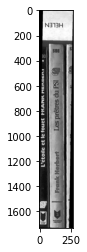

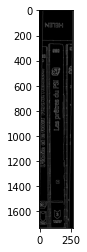

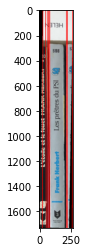

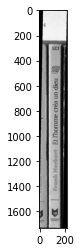

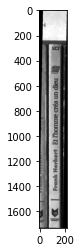

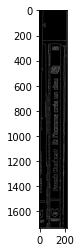

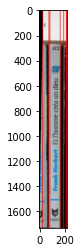

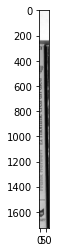

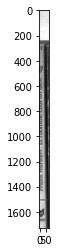

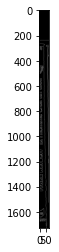

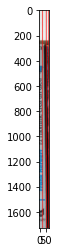

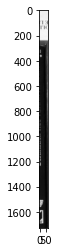

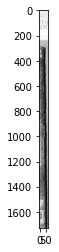

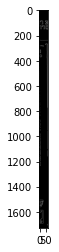

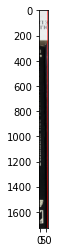

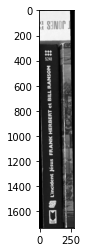

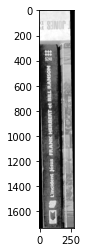

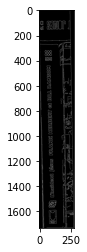

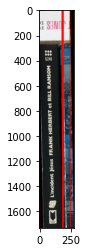

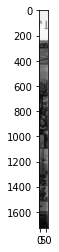

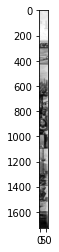

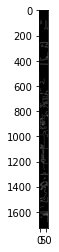

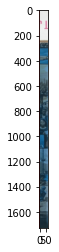

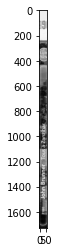

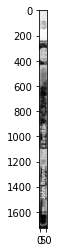

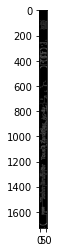

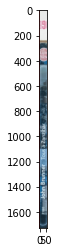

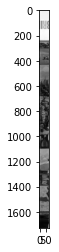

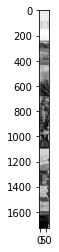

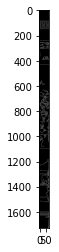

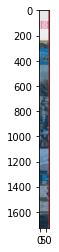

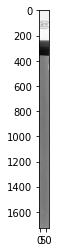

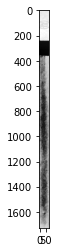

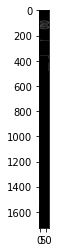

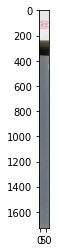

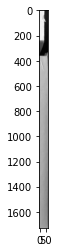

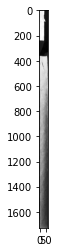

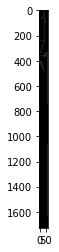

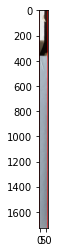

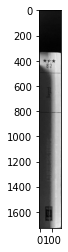

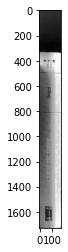

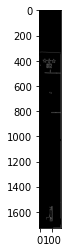

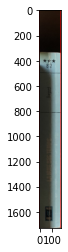

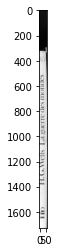

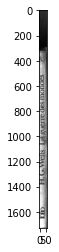

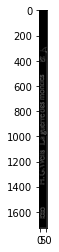

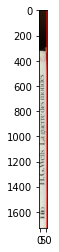

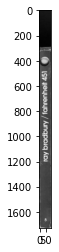

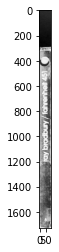

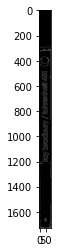

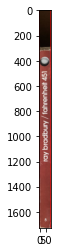

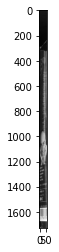

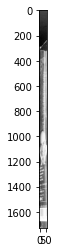

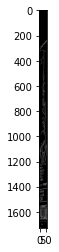

TypeError: 'NoneType' object is not iterable

In [122]:
''' all process '''

# image load
img = Image.open('../image/bookshelf/3.jpg')
plt.imshow(img)
plt.show()

# noise reducer
img = noiseReducer(img)

# orientation
reoriented = bookshelfOrientation(img)
plt.imshow(reoriented)
plt.show()

# bookshelf segmentation
rows = bookshelfSegmentation(reoriented)
for im in rows:
    plt.imshow(im)
    plt.show()

# row segmentation 1
row1 = []
for im in rows:
    spines = rowSegmentation1(im)
    row1 = row1 + spines
    
# row segmentation 2
row2 = []
for im in row1:
    spines = rowSegmentation2(im)
    row2 = row2 + spines

# spine extraction
bookSpine = []
for im in row2:
    bookSpine.append(bookSpineExtraction(im))

# book spine processing
for book in bookSpine:
    bookSpineProcessing(book)